In [ ]:
The aim of this project is to build prediction model to predict whether a review on the restaurant is positive or negative.

# To build a model following steps are followed

In [ ]:
1)Importing Dataset
2)Preprocessing Dataset
3)Vectorization
4)Training and Classification
5)Analysis Conclusion

In [40]:
#importing libraries

import pandas as pd
import numpy as np

# EDA
from nltk.util import ngrams
from wordcloud import WordCloud

#visualization
import matplotlib.pyplot as plt
import seaborn as sns


#to remove punctuations,stopwords,accented character and do contraction mapping,lemmatization,tokenization
from string import punctuation
from unidecode import unidecode
from contractions import fix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from collections import Counter

# feature engineering
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec

#model building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

# importing data

In [4]:

data=pd.read_csv("Restaurant_Reviews.tsv",delimiter = '\t',quoting = 3)
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Exploring the data

In [5]:
#checking data types and non null count with info() function

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
#checking missing values

data.isna().sum()

Review    0
Liked     0
dtype: int64

In [7]:
#checking data balancing 

data["Liked"].value_counts()

1    500
0    500
Name: Liked, dtype: int64

data is balanced

<AxesSubplot:xlabel='Liked', ylabel='count'>

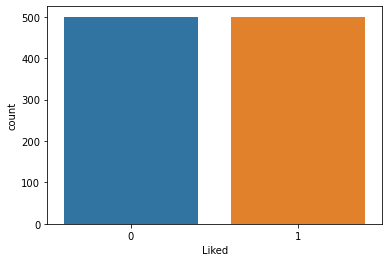

In [8]:
sns.countplot(x=data["Liked"])

# Data Preprocessing

In [ ]:
1)remove extra spaces,newlines
2)Contraction Mapping
3)Handling accented character
4)Cleaning text : Tokenization,lowercase conversion,remove punctuation,remove stopwords,len(word)<2 remove
5)Lemmatization

In [9]:
def remove_lines(data):
    text_after_removelines=data.replace("\n"," ").replace("\t"," ")
    return text_after_removelines

def expand(data):
    text_after_expand=fix(data)
    return text_after_expand

def handle_accented(data):
    text_after_handle_accented=unidecode(data)
    return text_after_handle_accented

stopwordlist=stopwords.words("english")
stopwordlist.remove("no")
stopwordlist.remove("nor")
stopwordlist.remove("not")

def data_cleaning(data):
    token=word_tokenize(data)
    clean_text=[word.lower() for word in token if (word.lower() not in punctuation) and (word.lower() not in stopwordlist) and (len(word)>2) and (word.isalpha())]
    return clean_text


def lemmatization(data):
    lemmatize=WordNetLemmatizer()
    final_text=[]
    for word in data:
        limmatized_word=lemmatize.lemmatize(word)
        final_text.append(limmatized_word)
    return " ".join(final_text)

In [10]:
clean_data=data["Review"].apply(remove_lines)

clean_data=clean_data.apply(expand)

clean_data=clean_data.apply(handle_accented)

clean_data=clean_data.apply(data_cleaning)

clean_data=clean_data.apply(lemmatization)

In [11]:
clean_data

0                                        wow loved place
1                                         crust not good
2                                not tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                 overall not impressed would not back
998    whole experience underwhelming think ninja sus...
999    not wasted enough life poured salt wound drawi...
Name: Review, Length: 1000, dtype: object

# EDA: Deep Understanding Of Data

In [12]:
#N grams

clean_data1=clean_data.apply(data_cleaning)
clean_data1

0                                    [wow, loved, place]
1                                     [crust, not, good]
2                           [not, tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                        [selection, menu, great, price]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997          [overall, not, impressed, would, not, back]
998    [whole, experience, underwhelming, think, ninj...
999    [not, wasted, enough, life, poured, salt, woun...
Name: Review, Length: 1000, dtype: object

In [13]:
def EDA_process(data,ngram_range):
    ngram_zip=ngrams(data,ngram_range)
    final_ngram=[]
    for ngram in ngram_zip:
        final_ngram.append(" ".join(ngram))
        return final_ngram    

In [14]:
unigrams=clean_data1.apply(lambda x : EDA_process(x,1))
bigrams=clean_data1.apply(lambda x  : EDA_process(x,2))
trigrams=clean_data1.apply(lambda x : EDA_process(x,3))

In [15]:
display(unigrams)
display(bigrams)
display(trigrams)

0            [wow]
1          [crust]
2            [not]
3        [stopped]
4      [selection]
          ...     
995        [think]
996     [appetite]
997      [overall]
998        [whole]
999          [not]
Name: Review, Length: 1000, dtype: object

0               [wow loved]
1               [crust not]
2               [not tasty]
3            [stopped late]
4          [selection menu]
               ...         
995            [think food]
996    [appetite instantly]
997           [overall not]
998      [whole experience]
999            [not wasted]
Name: Review, Length: 1000, dtype: object

0                     [wow loved place]
1                      [crust not good]
2                   [not tasty texture]
3                    [stopped late may]
4                [selection menu great]
                     ...               
995                 [think food flavor]
996           [appetite instantly gone]
997             [overall not impressed]
998    [whole experience underwhelming]
999                 [not wasted enough]
Name: Review, Length: 1000, dtype: object

In [16]:
#wordcloud

def generate_wordcloud(data,column): # "w1 w2 w3 w4"
    df = data[column].str.cat(sep=" ")
    text = " ".join([word for word in df.split()])
    wordcloud = WordCloud(width=700,height=500,background_color="white").generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

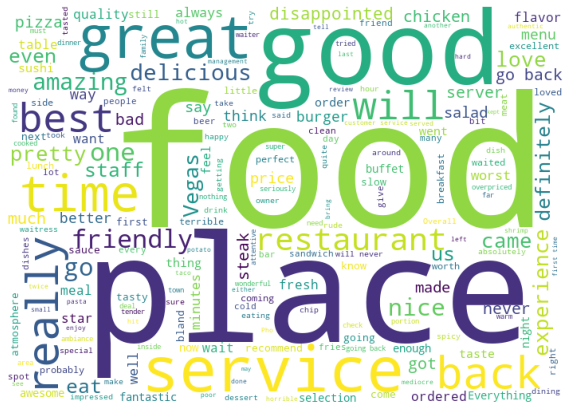

In [17]:
generate_wordcloud(data,"Review")

In [18]:
#visualizing the length of the document

for doc in clean_data1:
    print(f"length of the {doc} : ",len(doc))

length of the ['wow', 'loved', 'place'] :  3
length of the ['crust', 'not', 'good'] :  3
length of the ['not', 'tasty', 'texture', 'nasty'] :  4
length of the ['stopped', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved'] :  9
length of the ['selection', 'menu', 'great', 'price'] :  4
length of the ['getting', 'angry', 'want', 'damn', 'pho'] :  5
length of the ['honeslty', 'not', 'taste', 'fresh'] :  4
length of the ['potato', 'like', 'rubber', 'could', 'tell', 'made', 'ahead', 'time', 'kept', 'warmer'] :  10
length of the ['fry', 'great'] :  2
length of the ['great', 'touch'] :  2
length of the ['service', 'prompt'] :  2
length of the ['would', 'not', 'back'] :  3
length of the ['cashier', 'care', 'ever', 'say', 'still', 'ended', 'wayyy', 'overpriced'] :  8
length of the ['tried', 'cape', 'cod', 'ravoli', 'chicken', 'cranberry', 'mmmm'] :  7
length of the ['disgusted', 'pretty', 'sure', 'human', 'hair'] :  5
length of the ['shocked', 'sign', 'indicate', 'cas

length of the ['great', 'place', 'relax', 'awesome', 'burger', 'beer'] :  6
length of the ['perfect', 'family', 'meal', 'get', 'together', 'friend'] :  6
length of the ['not', 'much', 'flavor', 'poorly', 'constructed'] :  5
length of the ['patio', 'seating', 'comfortable'] :  3
length of the ['fried', 'rice', 'dry', 'well'] :  4
length of the ['hand', 'favorite', 'italian', 'restaurant'] :  4
length of the ['scream', 'legit', 'book', 'somethat', 'also', 'pretty', 'rare', 'vega'] :  8
length of the ['not', 'fun', 'experience'] :  3
length of the ['atmosphere', 'great', 'lovely', 'duo', 'violinist', 'playing', 'song', 'requested'] :  8
length of the ['personally', 'love', 'hummus', 'pita', 'baklava', 'falafel', 'baba', 'ganoush', 'amazing', 'eggplant'] :  10
length of the ['convenient', 'since', 'staying', 'mgm'] :  4
length of the ['owner', 'super', 'friendly', 'staff', 'courteous'] :  5
length of the ['great'] :  1
length of the ['eclectic', 'selection'] :  2
length of the ['sweet', 'p

# Feature Engineering

In [19]:
#CountVectorizer

count = CountVectorizer(max_features = 1500)
x = count.fit_transform(clean_data)
pd.DataFrame(x.A,columns=count.get_feature_names())

C:\Users\JOTIBA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledged,across,...,year,yellow,yellowtail,yelpers,yet,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#TF-IDF

tfidf = TfidfVectorizer(max_df=0.95,min_df=2,max_features=1000)
tfidf_val = tfidf.fit_transform(clean_data)
print("Vectorized format of each word of reviews:")
print()
pd.DataFrame(tfidf_val.A,columns=tfidf.get_feature_names())


Vectorized format of each word of reviews:



C:\Users\JOTIBA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolutely,acknowledged,actually,added,ago,almost,also,although,always,amazing,...,worst,worth,would,wow,wrap,wrong,year,yet,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.714543,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.377178,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#word2vec

def tokenize(data):
    tokens = word_tokenize(data)
    return tokens
clean_data = clean_data.apply(tokenize)

In [22]:
nested_list=clean_data.to_list()

In [23]:
word2vec_model = Word2Vec(nested_list,min_count=2,window=3)

In [24]:
word2vec_model.vector_size

100

In [25]:
def vectorizer(list_of_docs,model):
    
    feature =[] 
    zero_vector = np.zeros(model.vector_size)
    for row in list_of_docs: # iterating over reviews
        vectors =[] # to append vector of each word
        for word in row : # iterating over all words in a review
                try :
                    vectors.append(model.wv[word]) # appending vector of each word
                except:
                    vectors.append(zero_vector)
        if vectors: # if Vectors is a empty list or not 
            vectors = np.asarray(vectors) # converting multiple arrays into a single array
            avg_vec = vectors.mean(axis=0) # avg of all vectors
            feature.append(avg_vec) # appending the avg vector
        else :
            feature.append(zero_vector) # handling key error
    return feature

In [26]:
vectorized_doc = vectorizer(nested_list,word2vec_model)

In [27]:
vectorized_doc = np.array(vectorized_doc)

In [44]:
print("vectorized format of reviews:")
vectorized_doc

vectorized format of reviews:


array([[ 0.00118515,  0.00290705, -0.00377868, ..., -0.00105183,
         0.00627994, -0.00479026],
       [-0.002037  ,  0.00527868,  0.00461706, ..., -0.01120043,
         0.00081885,  0.00168956],
       [ 0.002402  ,  0.00337925,  0.00576276, ..., -0.00796489,
         0.00081031,  0.00024303],
       ...,
       [ 0.0009445 , -0.00149142,  0.000828  , ..., -0.00618026,
         0.00642105,  0.00170985],
       [-0.00216265,  0.00216254, -0.00098144, ..., -0.00243213,
         0.00208601, -0.00052658],
       [ 0.00168378,  0.00058116,  0.0017991 , ..., -0.00229123,
         0.00076176, -0.00129822]])

# Train-Test Splitting

In [76]:
x_train,x_test,y_train,y_test = train_test_split(tfidf_val,data.Liked,test_size=0.3,random_state=42)

# Model Building-Multinomial NB

In [77]:
mnb = MultinomialNB()
mnb.fit(x_train.A,y_train)

MultinomialNB()

In [78]:
predict_y_NB = mnb.predict(x_test.A)

In [79]:
predict_y_NB

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1], d

In [38]:
y_test[:10]

521    1
737    1
740    1
660    1
411    1
678    1
626    0
513    1
859    0
136    1
Name: Liked, dtype: int64

In [80]:
predict_y_NB[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

# Model Evaluation-Multinomial NB

In [81]:
#making confusion matrix

cnf_matrix= confusion_matrix(y_test, predict_y_NB)
print ("Confusion Matrix:\n",cnf_matrix)

Confusion Matrix:
 [[118  34]
 [ 32 116]]


In [82]:
#Accuracy,Precision,Recall

accuracy_NB= accuracy_score(y_test,predict_y_NB)
precision = precision_score(y_test,predict_y_NB)
recall= recall_score(y_test,predict_y_NB)
print("\n")
print("Accuracy is ",round(accuracy_NB*100,2),"%")
print("Precision is ",round(precision,2))
print("Recall is ",round(recall,2))



Accuracy is  78.0 %
Precision is  0.77
Recall is  0.78


# Model Building-Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
## Finding best values

dt_clf=DecisionTreeClassifier()

hyperparameters= { "criterion": ['gini','entropy'],
                   "max_depth": np.arange(3,8),
                   "min_samples_split":np.arange(2,20),
                   "min_samples_leaf": np.arange(2,10)
                 }

gscv_dt_model= GridSearchCV(dt_clf,hyperparameters,cv=5)
gscv_dt_model.fit(x_train,y_train)
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=15)

In [84]:
dt_clf=DecisionTreeClassifier(max_depth=7,min_samples_leaf=3,min_samples_split=12)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=12)

In [85]:
predict_y_dt = dt_clf.predict(x_test.A)

In [51]:
y_test[:5]

521    1
737    1
740    1
660    1
411    1
Name: Liked, dtype: int64

In [86]:
predict_y_dt[:5]

array([0, 1, 0, 1, 0], dtype=int64)

# Model Evaluation-Decision Tree

In [54]:
#making confusion matrix

cnf_matrix= confusion_matrix(y_test, predict_y_dt)
print ("Confusion Matrix:\n",cnf_matrix)

Confusion Matrix:
 [[147   5]
 [ 93  55]]


In [87]:
#Accuracy,Precision,Recall

accuracy_dt= accuracy_score(y_test,predict_y_dt)
precision = precision_score(y_test,predict_y_dt)
recall= recall_score(y_test,predict_y_dt)
print("\n")
print("Accuracy is ",round(accuracy_dt*100,2),"%")
print("Precision is ",round(precision,2))
print("Recall is ",round(recall,2))



Accuracy is  67.33 %
Precision is  0.92
Recall is  0.37


# Model Building-KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
#finding best values

knn_clf=KNeighborsClassifier()

hyperparameters= {'n_neighbors':np.arange(2,30),'p':[1,2]}

gscv_knn_clf= GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_params_

{'n_neighbors': 17, 'p': 2}

In [58]:
knn_clf=KNeighborsClassifier(n_neighbors=17,p=2)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [59]:
predict_y_knn = knn_clf.predict(x_test.A)

In [60]:
y_test[:5]

521    1
737    1
740    1
660    1
411    1
Name: Liked, dtype: int64

In [61]:
predict_y_knn[:5]

array([0, 0, 1, 1, 1], dtype=int64)

# Model Evaluation-KNN

In [62]:
#making confusion matrix

cnf_matrix= confusion_matrix(y_test, predict_y_knn)
print ("Confusion Matrix:\n",cnf_matrix)

Confusion Matrix:
 [[141  11]
 [ 66  82]]


In [64]:
#Accuracy,Precision,Recall

accuracy_knn= accuracy_score(y_test,predict_y_knn)
precision = precision_score(y_test,predict_y_knn)
recall= recall_score(y_test,predict_y_knn)
print("\n")
print("Accuracy is ",round(accuracy_knn*100,2),"%")
print("Precision is ",round(precision,2))
print("Recall is ",round(recall,2))



Accuracy is  74.33 %
Precision is  0.88
Recall is  0.55


# Model Building-logistic regression

In [65]:
log_clf=LogisticRegression()
log_clf.fit(x_train.A,y_train)

LogisticRegression()

In [66]:
y_pred_log=log_clf.predict(x_test.A)

In [67]:
y_test[:5]

521    1
737    1
740    1
660    1
411    1
Name: Liked, dtype: int64

In [68]:
y_pred_log[:5]

array([0, 1, 1, 1, 1], dtype=int64)

# Model Evaluation-logistic regression

In [70]:
#making confusion matrix

cnf_matrix= confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix:\n",cnf_matrix)

Confusion Matrix:
 [[122  30]
 [ 28 120]]


In [71]:
#Accuracy,Precision,Recall

accuracy_log= accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall= recall_score(y_test, y_pred_log)
print("\n")
print("Accuracy is ",round(accuracy_log*100,2),"%")
print("Precision is ",round(precision,2))
print("Recall is ",round(recall,2))



Accuracy is  80.67 %
Precision is  0.8
Recall is  0.81


In [89]:
#accuracy comparision between defferent models

print("Accuracy with NB:",round(accuracy_NB*100,2),"%")
print()
print("Accuracy with Decision Tree:",round(accuracy_dt*100,2),"%")
print()
print("Accuracy with KNN:",round(accuracy_knn*100,2),"%")
print()
print("Accuracy with Logistic Regression:",round(accuracy_log*100,2),"%")
print()

Accuracy with NB: 78.0 %

Accuracy with Decision Tree: 67.33 %

Accuracy with KNN: 74.33 %

Accuracy with Logistic Regression: 80.67 %



From the above results, Logistic Regression is slightly better method compared to Naive Bayes,Decision Tree and KNN,
with 80.67% accuracy which means the model built for the prediction of sentiment of the restaurant review gives 
80.67% right prediction.